In [185]:
# Initialize Otter
import otter
grader = otter.Notebook("Lab_4_data_fitting.ipynb")

# Lab week 4: Data fitting to see if we can detect a pick success y/n

Can you use the finger 1 stop time and max value to tell the difference between a successful and a failed pick?
Lab slides: https://docs.google.com/presentation/d/1NtoXYbl2nq1dkIU0KQE8ogjSCfb22wgLigY3JJpHHGI/edit?usp=sharing


In [186]:
# Install a pip package in the current Jupyter kernel
# Note: this is a safety check in case your JN install was not in the same place as your libraries
import sys
!{sys.executable} -m pip install scipy

In [187]:
# Doing the imports for you
import numpy as np
import json as json
from scipy.stats import linregress
import matplotlib.pyplot as plt
from numpy.polynomial import polynomial

## Read the data in 

In [199]:
# Read the same data in as for pre_lecture_3.py data in and put it in the data_ variables

# Read in week3_Motor position f1_success and failed
data_successful = np.loadtxt("Data/Motor position f1_successful.csv", dtype=int, delimiter=',')
data_failed = np.loadtxt("Data/Motor position f1_failed.csv", dtype=int, delimiter=',')
# END PROMPT"""


C:\Users\yeasshhhh\AppData\Local\Temp\ipykernel_28408\2589706092.py:4: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then convert it.  (On all NumPy versions.)
  (Deprecated NumPy 1.23)
  data_successful = np.loadtxt("Data/Motor position f1_successful.csv", dtype=int, delimiter=',')
C:\Users\yeasshhhh\AppData\Local\Temp\ipykernel_28408\2589706092.py:5: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use

In [200]:
grader.check("Read data")

Read data results: All test cases passed!

## Box plot of fitted lines for all data

In the lecture activity you fit a line to just one row (each) of the successful versus failed picks. In this lab you'll fit the line to ALL of the picks. For each pick, save the end point (time at the y_max value and the y_max value). You'll be making a box plot of this data to see if it looks different for successful versus failed picks.

Why a box plot? Box plots are better for visually showing multiple distributions in the same plot, where they can be compared side-by-side

See lab slides for what this should look like when you're done.

In [201]:

# TODO: Copy the fit_line_to_middle_bit function here
# END PROMPT"""
def fit_line_to_middle_bit(ts, ys, eps=.01):
    

    y_max = np.max(ys)
    y_min = np.min(ys)
    index = np.where(np.logical_and(ys > y_min + eps * (y_max - y_min), ys < y_max - eps * (y_max - y_min)))
    good_data = ts[index[0]]

    line = linregress(good_data, ys[index[0]])
    x_min = (y_min - line.intercept) / line.slope
    x_max = (y_max - line.intercept) / line.slope



    
    return (x_min, y_min), (x_max, y_max)

In [202]:
# TEST CELL
# TODO: Check that it works
#. - Create t values
#  - Call fit_line_to_middle_bit with the first row of the successful data and see if your answers
#. match the answers from lecture activity
xs = np.linspace(0, 1, 9)
ys = np.array([0, 0, 0, 0.25, 0.5, 0.75, 1, 1, 1])

y_min = np.min(ys)
print(y_min)    
lg_test = np.logical_and(ys == y_min, ys )
print(lg_test)
print(np.where(lg_test))   
print(f"{fit_line_to_middle_bit(xs, ys, eps=0.1)}")

0.0
[False False False False False False False False False]
(array([], dtype=int64),)
((0.25, 0.0), (0.75, 1.0))


In [192]:
# EXAMPLE CODE
# This bit of code shows how to do the nx2 array part

# Make the nx2 array - one row for each element
np_array_for_res = np.zeros((data_successful.shape[0], 2))
# For each row
for row in range(0, data_successful.shape[0]):
    # Put the min value in the first column, the max in the second
    np_array_for_res[row, 0] = np.min(data_successful[row, :])    
    np_array_for_res[row, 1] = np.max(data_successful[row, :])

    # This also works
    min_value = np.min(data_successful[row, :]) 
    max_value = np.max(data_successful[row, :])
    np_array_for_res[row, :] = [min_value, max_value]

print(np_array_for_res)

[[299. 429.]
 [299. 429.]
 [299. 429.]
 [299. 429.]
 [299. 429.]
 [299. 429.]
 [179. 329.]
 [299. 429.]
 [299. 429.]
 [179. 329.]
 [179. 329.]
 [299. 429.]
 [299. 429.]
 [299. 429.]
 [299. 429.]
 [179. 329.]
 [179. 329.]
 [299. 429.]
 [179. 329.]
 [299. 429.]
 [299. 429.]
 [299. 429.]
 [179. 329.]
 [299. 429.]
 [299. 429.]
 [179. 329.]
 [299. 429.]
 [179. 329.]
 [299. 429.]
 [299. 429.]
 [299. 429.]
 [299. 429.]
 [299. 429.]
 [299. 429.]
 [299. 429.]
 [299. 429.]
 [299. 429.]
 [299. 429.]
 [299. 429.]
 [299. 429.]
 [299. 429.]
 [299. 429.]
 [179. 329.]
 [179. 329.]
 [299. 429.]
 [299. 429.]
 [299. 429.]
 [269. 407.]
 [299. 429.]
 [179. 329.]
 [179. 329.]
 [299. 429.]
 [299. 429.]
 [299. 429.]
 [269. 407.]
 [299. 429.]
 [179. 329.]
 [299. 429.]
 [299. 429.]
 [269. 407.]
 [299. 429.]
 [299. 429.]
 [299. 429.]
 [179. 329.]
 [179. 329.]
 [299. 429.]
 [299. 429.]
 [299. 429.]
 [299. 429.]
 [299. 429.]
 [299. 429.]
 [179. 329.]
 [299. 429.]
 [179. 329.]
 [179. 329.]
 [299. 429.]
 [179. 329.]

In [193]:
#def fit_middle_all(ts, data):
    """ Fit the middle for every row of data
    @param ts - the t values to use
    @param data - n picks X timesteps
    @returns all end times, max values as one numpy array (n picks X 2)"""


    # TODO:
    #.    make numpy array to put data in (nx2)
    #.    for each row in data
    #.       start_pt, end_pt = fit_line_to_middle_bit(ts, current row)
    #        copy end_pt information into appropriate row in nx2 output
    #. return nx2 numpy array

    eps = .001
    
    extrema = np.zeros((data.shape[0], 2))
    points = np.zeros((data.shape[0], 2))
    extreme_index = ()
    tot_index = []    
    for row in range(0,data.shape[0]):
        extrema[row, 0]= np.min(data[row, :])
        extrema[row, 1] = np.max(data[row,:])
        start_pt, end_pt = fit_line_to_middle_bit(ts, data[row, :])
        point
        extreme_index = np.where(np.logical_and(data[row, :] > extrema[row, 0] + eps * (extrema[row, 1] - extrema[row, 0]), data[row, :] < extrema[row, 1] - eps * (extrema[row, 1] - extrema[row, 0])))
        not_a_numpy = (extreme_index[0]).astype(int)
        good_data = ts[not_a_numpy] 
        line = linregress(good_data, data[row, not_a_numpy])
        x_min = (extrema[row, 0] - line.intercept) / line.slope 
        x_max = (extrema[row, 1] - line.intercept) / line.slope
        points[row, 0] = x_min
        points[row, 1] = x_max
        
        print(not_a_numpy)
        tot_index.append(not_a_numpy)
    print(tot_index)
    
    x_extremes = []
    for row in range(len(tot_index)):
        good_data = ts
        line = linregress(good_data, data[row, tot_index[row]])
        x_min = (extrema[row, 0] - line.intercept) / line.slope
        x_max = (extrema[row, 1] - line.intercept) / line.slope
        x_extremes.append([x_min, x_max])   
    print(x_extremes)

    
    return np.array(x_extremes)

    mins = extrema[:,0]
    maxes = extrema[:,1]
        

IndentationError: unexpected indent (1179546444.py, line 3)

In [203]:
# TEST CELL
# Write the code to call the function here
def fit_middle_all(ts, data):
    """ Fit the middle for every row of data
    @param ts - the t values to use
    @param data - n picks X timesteps
    @returns all end times, max values as one numpy array (n picks X 2)"""


    # TODO:
    #.    make numpy array to put data in (nx2)
    #.    for each row in data
    #.       start_pt, end_pt = fit_line_to_middle_bit(ts, current row)
    #        copy end_pt information into appropriate row in nx2 output
    #. return nx2 numpy array

    eps = .001
    extrema = np.zeros((data.shape[0], 2))
    points = np.zeros((data.shape[0], 2))
    extreme_index = ()
    tot_index = []    
    for row in range(0,data.shape[0]):
        extrema[row, 0]= np.min(data[row, :])
        extrema[row, 1] = np.max(data[row,:])
        start_pt, end_pt = fit_line_to_middle_bit(ts, data[row, :])
        y_max = end_pt[1]
        x_max = end_pt[0]
        points[row, 0] = x_max
        points[row, 1] = y_max
      
    return points

In [ ]:

thing = fit_middle_all(xs,(data_successful))


IndexError: index 9 is out of bounds for axis 0 with size 9

In [205]:

# TODO:
#  Create the t values
#. Call your function twice, once with the successful data, once with the failed
time_step = 1.0/30.0
n_time_steps = data_successful.shape[1]
ts = np.arange(0, n_time_steps * time_step, time_step)
end_times_successful = fit_middle_all(ts, data_successful)
end_times_failed = fit_middle_all(ts, data_failed)
# END PROMPT"""

# Note for both of these: Small changes in how you index can result in slightly different numbers,
#  but the overall magnitude should be correct

# Note: Doing np.mean(nx2 array, 0) tells numpy to do the mean over each column (instead of the mean
#  over the entire nx2 array). So it should return 2 numbers - the mean of the times and the mean
#  of the y intercepts

# Should print Mean successful [3.98791579e-01 4.07402569e+02] and failed [  0.40810473 392.76044707]
print(f"Mean successful {np.mean(end_times_successful, 0)} and failed {np.mean(end_times_failed, 0)}")

# Should print First successful [4.09512247e-01 4.29880005e+02] and first failed [4.10117354e-01 4.29791992e+02]
print(f"First successful {end_times_successful[0]} and first failed {end_times_failed[0]}")


Mean successful [3.98203081e-01 4.06639437e+02] and failed [  0.40735483 391.92786885]
First successful [4.0921659e-01 4.2900000e+02] and first failed [4.10091743e-01 4.29000000e+02]


In [206]:
grader.check("Fitted_line_code")

Fitted_line_code results: All test cases passed!

<!-- BEGIN QUESTION -->

## Do the box plots

- Left window: t values of y_max point (the first column of end_times_*)

- Right window: y_max values (the sceond column of end_times_*)

Note that boxplot uses labels for labeling the x axis of the box plot.

Implementation order: for plotting, try calling box plot with just one column of data. Then add the second. 

Text(0.5, 1.0, 'Y max, motor position f1')

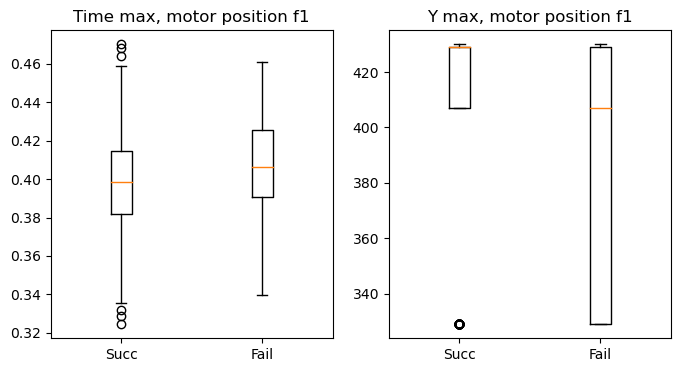

In [207]:
# Two plots

times = [end_times_successful[:, 0], end_times_failed[:, 0]]
y_vals = [end_times_successful[:, 1], end_times_failed[:, 1]]       
n_rows = 1
n_cols = 2
fig, axs = plt.subplots(n_rows, n_cols, figsize=(8, 4))

axs[0].boxplot(times, labels=["Succ", "Fail"])
axs[0].set_title("Time max, motor position f1")
axs[1].boxplot(y_vals, labels=["Succ", "Fail"])
axs[1].set_title("Y max, motor position f1") 



# Do the box plots...

In [208]:
# Manual grade
print("This is a manually-graded question; there is no grader.check() function. See rubric and slides for more information on expected output.")

This is a manually-graded question; there is no grader.check() function. See rubric and slides for more information on expected output.


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

Looking at the plots, do you think there is a difference between the successful versus failed data? Which would you use, time or max y value? Write your answer in the next cell.


yes, max y value shows the most  significant difference between success and failure.

<!-- END QUESTION -->

# Part 2: Fitting a curve to the wrist force data

## First step: Getting the data


The wrist force data has three channels (x,y,z). For this assignment, we want to get out the total summed force at the wrist, rather than each channel individually:

Equation: **sqrt (sum x,y,z (wrist force data)^2)**

Just like the last problem, the data has already been extracted from the proxy_pick_data.csv file and output for you (Wrist force_summed_*.csv). 

Optional: Do this extraction yourself. Read in wrist force data, sum it, and write it out to two csv files (one for successful, one for failed). Your homework code should be easy to change to do this.

In [209]:

# TODO: Read in the data from Data/Wrist_force summed*.csv (successful and failed)
# TODO: Optional: Read in the pick data and its description file, extract out the rows and columns you
#. care about, and write that data out (should be same as the .csv files)
data_wrist_force_successful = np.loadtxt("Data/Wrist force_summed_successful.csv",  dtype=float, delimiter=',')
data_wrist_force_failed = np.loadtxt("Data/Wrist force_summed_failed.csv", dtype= float, delimiter=',')
max = np.max(data_wrist_force_successful)
print(max)

20.460568884542635


In [ ]:
# Optional: If you do the extraction and sum yourself, put that code here

In [210]:
grader.check("Fit_curve")

Fit_curve results: All test cases passed!

<!-- BEGIN QUESTION -->

## Second step: Fit a cubic to the wrist force data (18 rows each successful/failed)

Split by successful and failed.

TODO: See slides for what the final plots should look like. I've handled the for loop and the plot indexing for you.

At this point, you should have the data in the form ts, ys for both the successful and the failed data. 

Where you're headed (pseudo code)

```python
- for 18/2 plots
-   for successful/failed
-      fit a cubic polynomial to the data
-      plot the data and the fitted polynomial
```

Implementation steps: You could write a function for doing the polynomial fit, but since there already is one (polynomial.polyval) you probably don't need one.

Steps (use the scratch cell to do the first part)
- Fit polynomial for one row of data
- Plot it and make sure it looks correct
- Copy that code into the for loop, adjusting for which row (p) and which subplot (axs[r, c])

Note: It can take a few seconds to plot.

Note 2: This is really only two lines of code; but you should spend some time understanding the provided code. 

In [211]:
# EXAMPLE CODE - row column indexing, how to put n things into a grid

# If you have n things, and you want to put them in r rows, first figure out how many columns you'll need
#  Integer division: 
#    n // r  gives the number of times r can go into n
#    n % r gives the left over - it is always in the range 0 to n-1
n = 15
r = 4
c = n // r  # this gives the floor of n / r, which in this case will be 15/4 is 3
if n % r != 0:  # % is modulus - unless r goes exactly into n we need to add a bit (some of the last columns will be empty)
    c += 1   # Make c one bigger

# Go through all of n
for i in range(0, n):
    row = i // r   # Which row we're on
    col = i % r    # Which column we're on
    end_str = " "       # Use a space at the end of the pring
    if col == r-1:
        end_str = "\n"  # ... except at the end of the row
    print(f"n{i}r{row}c{col} ", end=end_str)  # No return


n0r0c0  n1r0c1  n2r0c2  n3r0c3 
n4r1c0  n5r1c1  n6r1c2  n7r1c3 
n8r2c0  n9r2c1  n10r2c2  n11r2c3 
n12r3c0  n13r3c1  n14r3c2  

In [ ]:
# EXAMPLE CODE - zip
# These two pieces of code do the same thing
a_str = ("foo", "bar")
b_number = (3, 10)
for i in range(len(a_str)):
    a = a_str[i]
    b = b_number[i]
    print(f"Loop iteration {i} has {a} and {b}")

# Look, no i!
for a, b in zip(a_str, b_number):
    print(f"Loop iteration... um... has {a} and {b}")

Loop iteration 0 has foo and 3
Loop iteration 1 has bar and 10
Loop iteration... um... has foo and 3
Loop iteration... um... has bar and 10


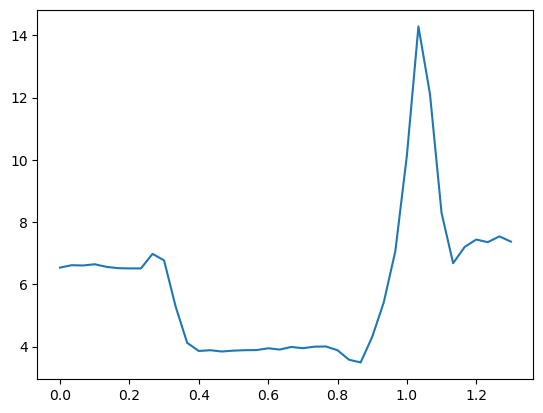

In [212]:
# SCRATCH CELL
# Practice the polynomial fit with one row of data
# Plot the data, plot the fitted polynomial
# You'll need ts to do both of these

poly_nums = polynomial.polyfit(ts, data_wrist_force_successful[0, :], 3)
poly_vals = polynomial.polyval(ts, poly_nums)
plt.plot(ts, data_wrist_force_successful[0, :])

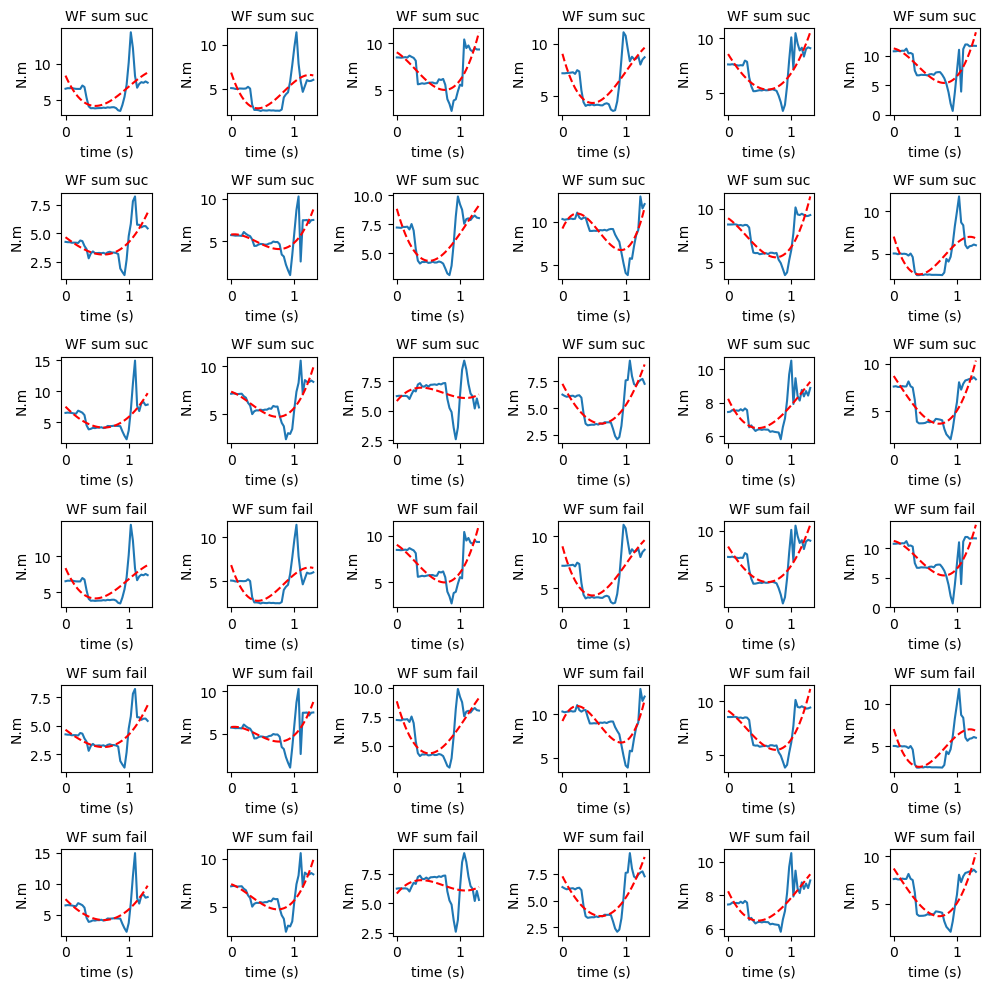

In [213]:
n_rows = 6
n_cols = 6
fig, axs = plt.subplots(n_rows, n_rows, figsize=(10, 10))

ch_name = "WF sum"
# This loops over the first half of the rows
for p in range(0, (n_rows // 2) * n_cols):
    # This is fancy python-ness to have the first time through the loop
    #   - first time, the row offset is 0, the data is data_wrist_force_successful, the str_title is "suc"
    #   - second time, the row offset is 3, the data is data_wrist_force_failed, the str_title is "fail"
    for row_offset, data, str_title in zip((0, 3), (data_wrist_force_successful, data_wrist_force_failed), ("suc", "fail")):
        # Yes, this works - it's the same as doing r = row_offset + p // ncols on one line,
        #   and c = p % n_cols on the second line
        r, c = row_offset + p // n_cols, p % n_cols
        axs[r, c].plot(ts, data_wrist_force_successful[p], label="Data")

        # Fit a polynomial of degree 3 to the variable data
        # Then plot the polynomial
        poly_nums = polynomial.polyfit(ts, data_wrist_force_successful[p], 3)
        axs[r, c].plot(ts,polynomial.polyval(ts, poly_nums),  'r--', label="Poly fit") 

    

        axs[r, c].set_xlabel("time (s)")
        axs[r, c].set_ylabel("N.m")
        # Build the title string from the channel name and the success/failed string
        axs[r, c].set_title(f"{ch_name} " + str_title, fontsize=10)

plt.tight_layout()

In [214]:
# Manual grade
print("This is a manually-graded question; there is no grader.check() function. See rubric and slides for more information on expected output.")

This is a manually-graded question; there is no grader.check() function. See rubric and slides for more information on expected output.


<!-- END QUESTION -->

## Hours and collaborators
Required for every assignment - fill out before you hand-in.

Listing names and websites helps you to document who you worked with and what internet help you received in the case of any plagiarism issues. You should list names of anyone (in class or not) who has substantially helped you with an assignment - or anyone you have *helped*. You do not need to list TAs.

Listing hours helps us track if the assignments are too long.

In [215]:

# List of names (creates a set)
worked_with_names = {"none"}
# List of URLS TCW3 (creates a set)
websites = {"<https://stackoverflow.com/questions/49554139/boxplot-of-multiple-columns-of-a-pandas-dataframe-on-the-same-figure-seaborn>, i was trying to set each bx plot by calling the data after after boxplot ([end_times_successful[:, 0], end_times_failed[:, 0]]). this helped me understand I needed that data to be array'd before calling."}
# Approximate number of hours, including lab/in-class time
hours = 7.5

In [216]:
grader.check("hours_collaborators")

hours_collaborators results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Submit through gradescope, lab 4 data analysis. Turn in just the .ipynb file - we will supply the data files.

In [217]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)

Running your submission against local test cases...




RuntimeError: c:\Users\yeasshhhh\anaconda3\Lib\site-packages\zmq\_future.py:679: RuntimeWarning: Proactor event loop does not implement add_reader family of methods required for zmq. Registering an additional selector thread for add_reader support via tornado. Use `asyncio.set_event_loop_policy(WindowsSelectorEventLoopPolicy())` to avoid this warning.
  self._get_loop()
